In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/CSC522_Final_Project'

/content/drive/MyDrive/CSC522_Final_Project


In [ ]:
!ls

 archive.zip		  ham_subject_corpus		 spam_message_corpus
 enron_spam_data.csv	 'spam_ham_dataset (1).gsheet'	 spam_subject_corpus
 enron_spam_data.gsheet   spam_ham_dataset.csv		 x_train_tsne
 enron_spam_data.zip	  spam_ham_dataset.gsheet


In [ ]:
#Import all libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.tokenize import word_tokenize

import pickle
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Reading dataset
df = pd.read_csv("enron_spam_data.csv")

In [ ]:
print(df.head(10))

   Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   
5           5      mcmullen gas for 11 / 99   
6           6         meter 1517 - jan 1999   
7           7           duns number changes   
8           8                    king ranch   
9           9        re : entex transistion   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  
5  jackie ,\nsince the inl

In [ ]:
label= df["Spam/Ham"].value_counts()
print(label)

spam    17171
ham     16545
Name: Spam/Ham, dtype: int64


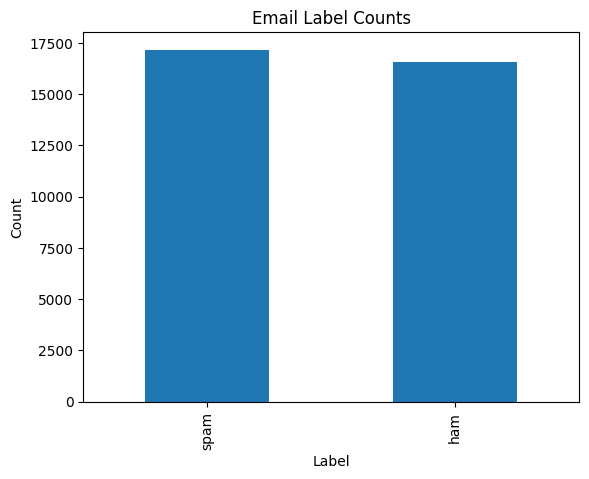

In [ ]:
#plot label counts
label.plot.bar()
plt.title("Email Label Counts")
plt.xlabel("Label")
plt.ylabel("Count")
#show the number over the bar
plt.show()

In [ ]:
# convert all text to lowwer case
df['Subject'] = df['Subject'].str.lower()
df['Message'] = df['Message'].str.lower()


In [ ]:
df.head(5)

Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14

In [ ]:
#preprocessing to remove punctuations and words like re : from subject and message
df['Subject'].fillna('', inplace=True)
df['Message'].fillna('', inplace=True)
df['Subject'] = df['Subject'].str.replace('[^\w\s]', '', regex=True)
df['Message'] = df['Message'].str.replace('[^\w\s]', '', regex=True)

In [ ]:
# Combining 'Subject' and 'Message' into a single column
df['text'] = df['Subject'] + ' ' + df['Message']

In [ ]:
# Assuming df is your DataFrame containing the 'text' column
# Tokenize the 'text' column and create a new column 'tokenized_text' to store the tokenized data
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x))
df['tokenized_subject'] = df['Subject'].apply(lambda x: word_tokenize(x))
df['tokenized_message'] = df['Message'].apply(lambda x: word_tokenize(x))

In [ ]:
def make_wordcloud(text , stopword):
    word_cloud = WordCloud(
            width=900,
            height=600,
            random_state=1,
            background_color="black",
            colormap="Pastel1",
            collocations=False,
            stopwords=stopword,
            ).generate(text)
    return word_cloud

In [ ]:
spam_subject_corpus = []
spam_message_corpus = []
ham_subject_corpus = []
ham_message_corpus = []

In [ ]:
spam_subject_corpus = df[df['Spam/Ham']=='spam']['tokenized_subject'].to_list()
#print(spam_subject_corpus)
spam_subject_corpus = [item for sublist in spam_subject_corpus for item in sublist]
#print(spam_subject_corpus[:20])

In [ ]:
spam_message_corpus = df[df['Spam/Ham']=='spam']['tokenized_message'].to_list()
print(spam_message_corpus[:5])
spam_message_corpus = [item for sublist in spam_message_corpus for item in sublist]
print(spam_message_corpus[:20])

[['introducing', 'doctor', 'formulated', 'hgh', 'human', 'growth', 'hormone', 'also', 'called', 'hgh', 'is', 'referred', 'to', 'in', 'medical', 'science', 'as', 'the', 'master', 'hormone', 'it', 'is', 'very', 'plentiful', 'when', 'we', 'are', 'young', 'but', 'near', 'the', 'age', 'of', 'twenty', 'one', 'our', 'bodies', 'begin', 'to', 'produce', 'less', 'of', 'it', 'by', 'the', 'time', 'we', 'are', 'forty', 'nearly', 'everyone', 'is', 'deficient', 'in', 'hgh', 'and', 'at', 'eighty', 'our', 'production', 'has', 'normally', 'diminished', 'at', 'least', '90', '95', 'advantages', 'of', 'hgh', 'increased', 'muscle', 'strength', 'loss', 'in', 'body', 'fat', 'increased', 'bone', 'density', 'lower', 'blood', 'pressure', 'quickens', 'wound', 'healing', 'reduces', 'cellulite', 'improved', 'vision', 'wrinkle', 'disappearance', 'increased', 'skin', 'thickness', 'texture', 'increased', 'energy', 'levels', 'improved', 'sleep', 'and', 'emotional', 'stability', 'improved', 'memory', 'and', 'mental', 'a

In [ ]:
ham_subject_corpus = df[df['Spam/Ham']=='ham']['tokenized_subject'].to_list()
print(ham_subject_corpus)
ham_subject_corpus = [item for sublist in ham_subject_corpus for item in sublist]
print(ham_subject_corpus[:20])

[['christmas', 'tree', 'farm', 'pictures'], ['vastar', 'resources', 'inc'], ['calpine', 'daily', 'gas', 'nomination'], ['re', 'issue'], ['meter', '7268', 'nov', 'allocation'], ['mcmullen', 'gas', 'for', '11', '99'], ['meter', '1517', 'jan', '1999'], ['duns', 'number', 'changes'], ['king', 'ranch'], ['re', 'entex', 'transistion'], ['entex', 'transistion'], ['lst', 'rev', 'dec', '1999', 'josey', 'ranch', 'nom'], ['2', 'nd', 'rev', 'dec', '1999', 'josey', 'ranch', 'nom'], ['unify', 'close', 'schedule'], ['meter', '1431', 'nov', '1999'], ['meter', '1431', 'nov', '1999'], ['y', '2', 'k', 'texas', 'log'], ['re', 'lyondell', 'citgo'], ['hpl', 'fuel', 'gas', 'buy', 'back', 'for', 'december', '1999'], ['ua', '4', 'meter', '1441', 'for', '11', '97', 'falfurrias'], ['ua', '4', 'for', 'meter', '8608', '6', '98', 'deal', '96731'], ['january', 'spot', 'tickets'], ['pennzenergy', 'property', 'details'], ['miscellaneous'], ['re', 'purge', 'of', 'old', 'contract', '_', 'event', '_', 'status'], ['out', 

In [ ]:
ham_message_corpus = df[df['Spam/Ham']=='ham']['tokenized_message'].to_list()
print(ham_message_corpus[:5])
ham_message_corpus = [item for sublist in ham_message_corpus for item in sublist]
print(ham_message_corpus[:20])

[[], ['gary', 'production', 'from', 'the', 'high', 'island', 'larger', 'block', 'a', '1', '2', 'commenced', 'on', 'saturday', 'at', '2', '00', 'p', 'm', 'at', 'about', '6', '500', 'gross', 'carlos', 'expects', 'between', '9', '500', 'and', '10', '000', 'gross', 'for', 'tomorrow', 'vastar', 'owns', '68', 'of', 'the', 'gross', 'production', 'george', 'x', '3', '6992', 'forwarded', 'by', 'george', 'weissman', 'hou', 'ect', 'on', '12', '13', '99', '10', '16', 'am', 'daren', 'j', 'farmer', '12', '10', '99', '10', '38', 'am', 'to', 'carlos', 'j', 'rodriguez', 'hou', 'ect', 'ect', 'cc', 'george', 'weissman', 'hou', 'ect', 'ect', 'melissa', 'graves', 'hou', 'ect', 'ect', 'subject', 'vastar', 'resources', 'inc', 'carlos', 'please', 'call', 'linda', 'and', 'get', 'everything', 'set', 'up', 'i', 'm', 'going', 'to', 'estimate', '4', '500', 'coming', 'up', 'tomorrow', 'with', 'a', '2', '000', 'increase', 'each', 'following', 'day', 'based', 'on', 'my', 'conversations', 'with', 'bill', 'fischer', 'a

In [ ]:
with open('spam_subject_corpus', 'wb') as f:
  pickle.dump(spam_subject_corpus, f)

with open('spam_message_corpus', 'wb') as f:
  pickle.dump(spam_message_corpus, f)

with open('ham_subject_corpus', 'wb') as f:
  pickle.dump(ham_subject_corpus, f)

with open('ham_subject_corpus', 'wb') as f:
  pickle.dump(ham_subject_corpus, f)

In [ ]:
#add any stop words we might see in the wordcloud
more_stopwords = {'re' , 's', 'fw', 'enron', 'subject', 'e', 'u'}
STOPWORDS = STOPWORDS.union(more_stopwords)

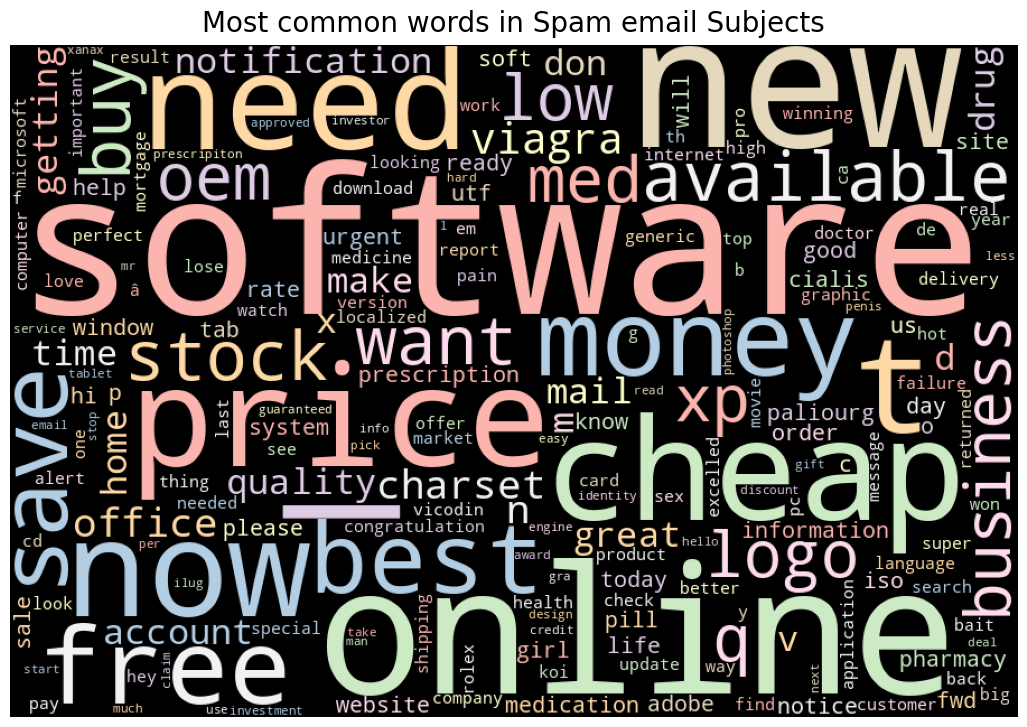

In [ ]:
spam_subject_wordcloud = make_wordcloud (" ".join(spam_subject_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Spam email Subjects", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(spam_subject_wordcloud)
plt.axis("off")
plt.show()

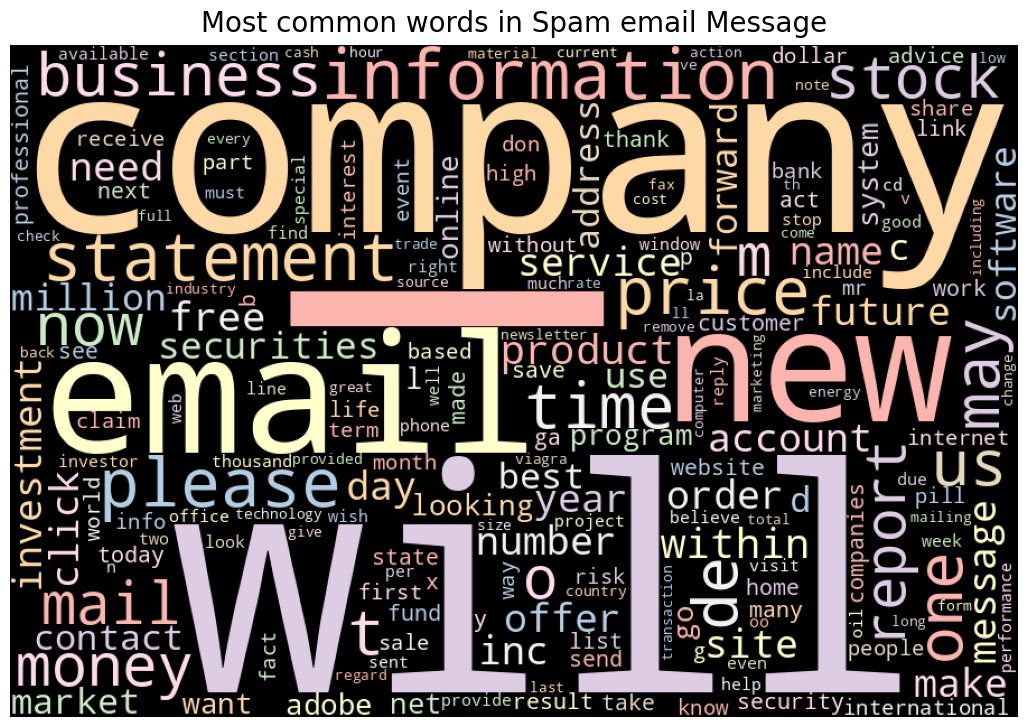

In [ ]:
spam_message_wordcloud = make_wordcloud (" ".join(spam_message_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Spam email Message", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(spam_message_wordcloud)
plt.axis("off")
plt.show()

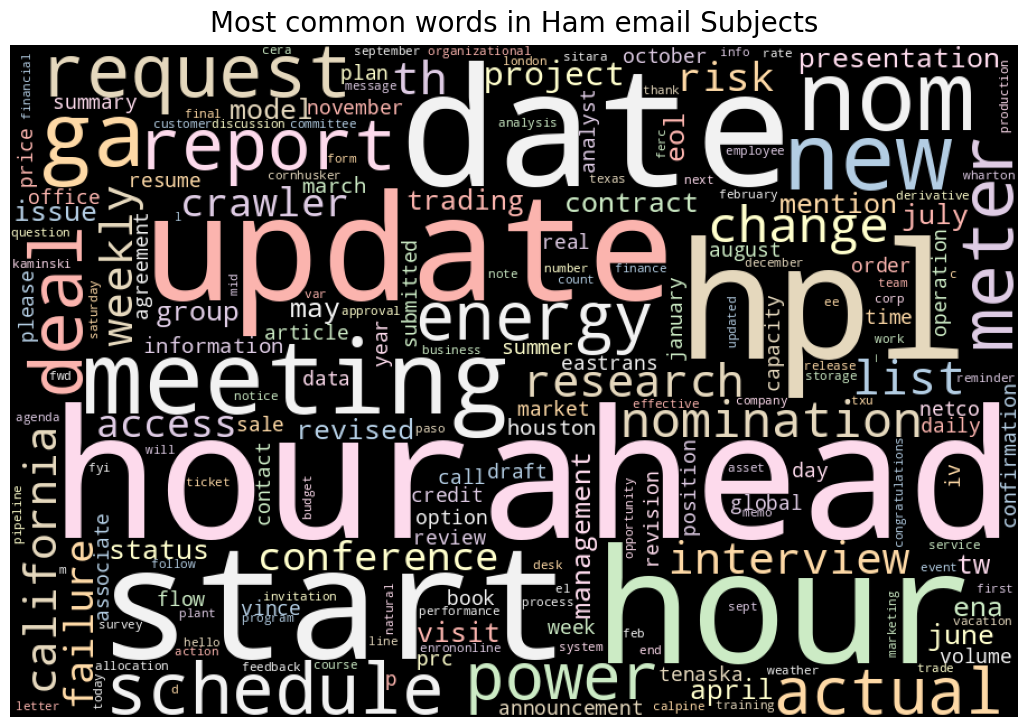

In [ ]:
ham_subject_wordcloud = make_wordcloud (" ".join(ham_subject_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Ham email Subjects", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(ham_subject_wordcloud)
plt.axis("off")
plt.show()

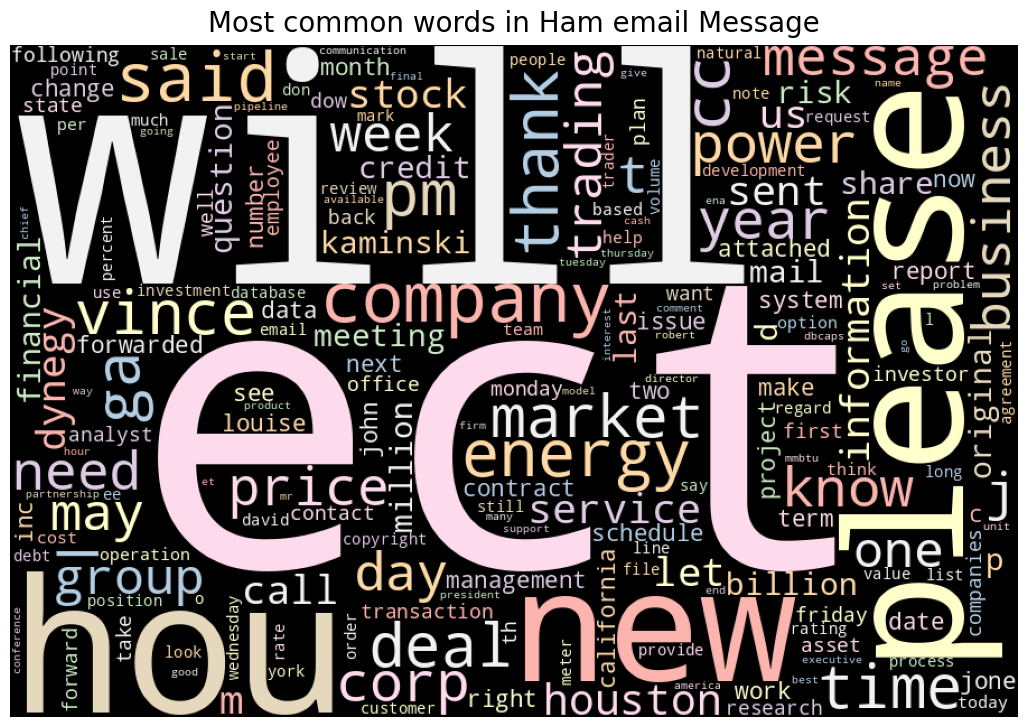

In [ ]:
ham_message_wordcloud = make_wordcloud (" ".join(ham_message_corpus) , STOPWORDS)
plt.figure(figsize=(13, 13))
plt.title("Most common words in Ham email Message", fontdict={'size': 20, 'color': 'black', 'verticalalignment': 'bottom'})
plt.imshow(ham_message_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df.head(5)

Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1        vastar resources  inc    
2           2  calpine daily gas nomination   
3           3                     re  issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  \
0                                                         ham  1999-12-10   
1  gary  production from the high island larger b...      ham  1999-12-13   
2                calpine daily gas nomination 1  doc      ham  1999-12-14   
3  fyi  see note below  already done \nstella\n  ...      ham  1999-12-14   
4  fyi \n                      forwarded by lauri...      ham  1999-12-14   

                                                text  \
0                      christmas tree farm pictures    
1  vastar resources  inc  gary  production from t...   
2  calpine daily gas nomination  calpine daily ga...   
3  re  issue fyi  see note below  already done \n...   
4  meter 7268 nov allocation fyi \n              ...   

                                      tokenized_text  \
0                  [christmas, tree, farm, pictures]   
1  [vastar, resources, inc, gary, production, fro...   
2  [calpine, daily, gas, nomination, calpine, dai...   
3  [re, issue, fyi, see, note, below, already, do...   
4  [meter, 7268, nov, allocation, fyi, forwarded,...   

                   tokenized_subject  \
0  [christmas, tree, farm, pictures]   
1           [vastar, resources, inc]   
2  [calpine, daily, gas, nomination]   
3                        [re, issue]   
4     [meter, 7268, nov, allocation]   

                                   tokenized_message  
0                                                 []  
1  [gary, production, from, the, high, island, la...  
2          [calpine, daily, gas, nomination, 1, doc]  
3  [fyi, see, note, below, already, done, stella,...  
4  [fyi, forwarded, by, lauri, a, allen, hou, ect...

In [ ]:
import gensim

In [ ]:
X = df['tokenized_text']
y = df['Spam/Ham']
vector_size = 200
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=vector_size,
                                   window=5,
                                   min_count=2)

In [ ]:
#w2v_model.wv.index_to_key

['the',
 'to',
 'and',
 'of',
 'a',
 'in',
 'for',
 'you',
 '_',
 'is',
 'this',
 'enron',
 'on',
 'that',
 'i',
 's',
 'your',
 'with',
 'be',
 'we',
 'as',
 'from',
 'have',
 'will',
 'it',
 'are',
 'ect',
 'or',
 'at',
 'not',
 'by',
 'our',
 '1',
 'if',
 'com',
 'company',
 'all',
 'please',
 'can',
 'an',
 '2',
 'has',
 '3',
 'hou',
 'was',
 'any',
 'me',
 'e',
 '2001',
 'would',
 'no',
 'new',
 'its',
 '10',
 '2000',
 'more',
 'subject',
 'my',
 'am',
 '5',
 'but',
 'may',
 'information',
 't',
 '00',
 'do',
 'which',
 'time',
 're',
 'about',
 'said',
 'gas',
 'up',
 'business',
 'been',
 'one',
 'energy',
 'they',
 '0',
 'out',
 'us',
 'http',
 '4',
 'get',
 'here',
 'email',
 '000',
 'he',
 'message',
 'pm',
 'their',
 'price',
 'these',
 '11',
 'know',
 'cc',
 'there',
 'now',
 'also',
 'other',
 '01',
 'only',
 'mail',
 'so',
 'need',
 'over',
 'power',
 'what',
 'm',
 'vince',
 'market',
 'thanks',
 '7',
 'some',
 'like',
 'corp',
 '8',
 'stock',
 'd',
 '12',
 'www',
 '6',


In [ ]:
words = set(w2v_model.wv.index_to_key )

X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(vector_size, dtype=float))

X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(vector_size, dtype=float))

In [ ]:
from sklearn.manifold import TSNE

tsne =  TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
X_embedded = tsne.fit_transform(pd.DataFrame(X_train_vect_avg))
print(X_embedded.shape)


(26972, 2)


In [ ]:
X_embedded = pd.DataFrame(X_embedded)
print(X_embedded.columns)
X_embedded.columns = ['X','Y']
print(X_embedded.columns)
X_embedded['hue'] = y_train


Index(['X', 'Y', 'hue'], dtype='object')


ValueError: ignored

In [ ]:
print(X_embedded.head())

           X          Y  hue
0  90.291466 -48.791832    0
1  57.194206  42.588577    0
2  63.626495  47.195793    0
3 -39.673481  40.691689    1
4  -7.375037 -18.770073    0


In [ ]:
import seaborn as sns

<Axes: xlabel='X', ylabel='Y'>

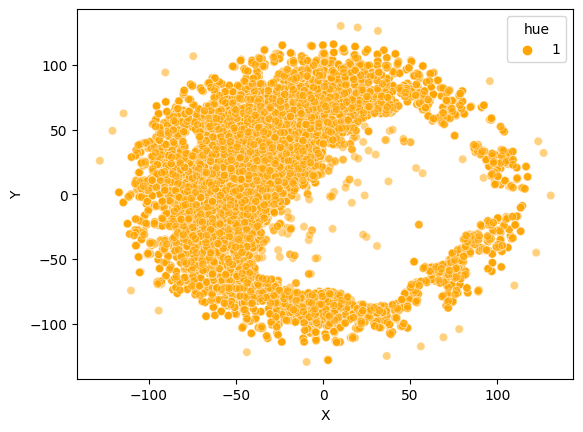

In [ ]:

sns.scatterplot(x='X', y='Y', data=X_embedded[X_embedded['hue']==1], hue='hue', alpha=0.5, palette=['orange'] )

<Axes: xlabel='X', ylabel='Y'>

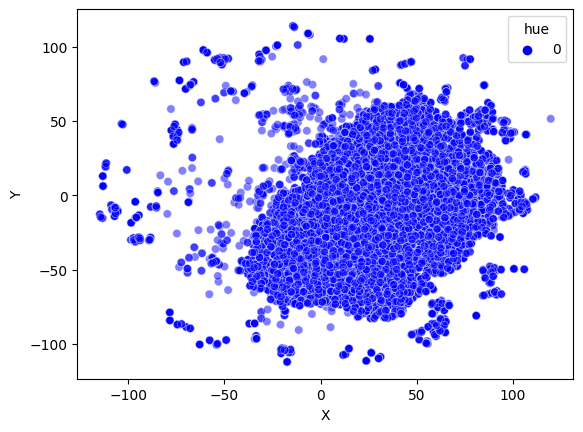

In [ ]:
sns.scatterplot(x='X', y='Y', data=X_embedded[X_embedded['hue']==0], hue='hue', alpha=0.5, palette=['blue'] )

<Axes: xlabel='X', ylabel='Y'>

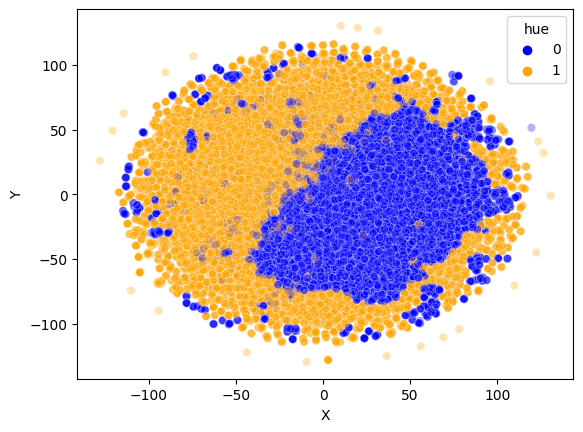

In [ ]:
sns.scatterplot(x='X', y='Y', data=X_embedded, hue='hue', alpha=0.3, palette=[ 'blue', 'orange'] )

In [ ]:
with open('x_train_tsne', 'wb') as f:
  pickle.dump(X_embedded, f)


In [ ]:
# Instantiate and fit a basic Random Forest model on top of the vectors
from sklearn.ensemble import RandomForestClassifier
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.transform(y_test)
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train)

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect_avg)

In [ ]:
print(y_test)
print(y_pred)
print(y_train)
print(Encoder.transform(y_pred))

[1 0 1 ... 0 0 1]
[1 0 1 ... 0 0 1]
[0 0 0 ... 0 0 1]


ValueError: ignored

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Precision: 0.979 / Recall: 0.99 / Accuracy: 0.984


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3276
           1       0.98      0.99      0.98      3468

    accuracy                           0.98      6744
   macro avg       0.98      0.98      0.98      6744
weighted avg       0.98      0.98      0.98      6744



In [ ]:
print(np.unique(y_pred, return_counts=True))
print(np.unique(y_test, return_counts=True))
print(np.unique(y_train, return_counts=True))
print(np.unique(rf_model.predict(X_train_vect_avg), return_counts=True))

(array([0, 1]), array([3235, 3509]))
(array([0, 1]), array([3276, 3468]))
(array([0, 1]), array([13269, 13703]))
(array([0, 1]), array([13269, 13703]))


In [ ]:
# Create a TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, norm='l2', stop_words=list(STOPWORDS))

In [ ]:
#Train and Test split
X = df['text']
y = df['Spam/Ham']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)
print('Encoder classes ', Encoder.classes_)
#Embedding the train and test set
print(X_train, type(X_train), type(X_train.to_list()))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Encoder classes  ['ham' 'spam']
17887    start date  1  26  02  hourahead hour  19  sta...
28698    interesting article interesting article  espec...
8292     california update 1  22  01 executive summary\...
31315    shop and save at discount pharmacy expedite th...
5927     talon find attached the mc model for talon  a ...
                               ...                        
16850    buy  back strategy group \nthis is an email i ...
6265     intranet site dear dale  all \nthanks for the ...
11284    re  contracts michelle \nsee below  lets see h...
860      ami     i agree  \nthanks \n                  ...
15795    inexpensive online medication here legion news...
Name: text, Length: 26972, dtype: object <class 'pandas.core.series.Series'> <class 'list'>


In [ ]:
print(X_train)
print(X_train_tfidf)


17887    start date  1  26  02  hourahead hour  19  sta...
28698    interesting article interesting article  espec...
8292     california update 1  22  01 executive summary\...
31315    shop and save at discount pharmacy expedite th...
5927     talon find attached the mc model for talon  a ...
                               ...                        
16850    buy  back strategy group \nthis is an email i ...
6265     intranet site dear dale  all \nthanks for the ...
11284    re  contracts michelle \nsee below  lets see h...
860      ami     i agree  \nthanks \n                  ...
15795    inexpensive online medication here legion news...
Name: text, Length: 26972, dtype: object
  (0, 4664)	0.16781471135624162
  (0, 1858)	0.1379633166108083
  (0, 2439)	0.14938590603919732
  (0, 3987)	0.1557808349253629
  (0, 809)	0.1413619245710578
  (0, 4889)	0.16949732303663376
  (0, 3432)	0.15624073436362668
  (0, 1849)	0.12573649467416753
  (0, 3250)	0.16925191829767824
  (0, 2875)	0.156030936445

In [ ]:
print(tfidf_vectorizer.get_feature_names_out()[-4900:])

['28' '281' '289' ... 'zone' 'zonedubai' 'zu']


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#performing PCA with 2 components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

In [ ]:
#Training the classifier
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

ValueError: ignored

In [ ]:
#Make predictions using test data
y_pred = classifier.predict(X_test_tfidf)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9814650059311981


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3276
           1       0.98      0.99      0.98      3468

    accuracy                           0.98      6744
   macro avg       0.98      0.98      0.98      6744
weighted avg       0.98      0.98      0.98      6744



In [ ]:
from sklearn.svm import SVC

In [ ]:
#Creating and training the SVM classifier

svm_classifier = SVC()
svm_classifier.fit(X_train_vect_avg, y_train)

SVC()

In [ ]:
#making predictions using test data
svm_y_pred = svm_classifier.predict(X_test_vect_avg)

In [ ]:
#evaluating the SVM classifier
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy: ",svm_accuracy,"\n")

print("SVM Classification report: ")
print(classification_report(y_test, svm_y_pred))

Accuracy:  0.9839857651245552 

SVM Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3276
           1       0.98      0.99      0.98      3468

    accuracy                           0.98      6744
   macro avg       0.98      0.98      0.98      6744
weighted avg       0.98      0.98      0.98      6744



In [ ]:
#KNN with k=5 and euclidean distance

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#creating and training the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn_classifier.fit(X_train_vect_avg, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [ ]:
#making predictions using test data
knn_y_pred = knn_classifier.predict(X_test_vect_avg)

In [ ]:
# Evaluate the KNN classifier
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy:", knn_accuracy)

print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

KNN Accuracy: 0.978202846975089
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3276
           1       0.98      0.98      0.98      3468

    accuracy                           0.98      6744
   macro avg       0.98      0.98      0.98      6744
weighted avg       0.98      0.98      0.98      6744



In [ ]:
# Train the Naive Bayes classifier on PCA transformed data
pca_classifier = MultinomialNB()
pca_classifier.fit(X_train_pca, y_train)

# Make predictions using test data
pca_y_pred = pca_classifier.predict(X_test_pca)

# Evaluate the PCA classifier
pca_accuracy = accuracy_score(y_test, pca_y_pred)
print("PCA Accuracy:", pca_accuracy)

print("PCA Classification Report:")
print(classification_report(y_test, pca_y_pred))

In [ ]:
# Train the KNN classifier on PCA transformed data
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_classifier.fit(X_train_pca, y_train)

#making predictions using test data
knn_y_pred_pca = knn_classifier.predict(X_test_tfidf)

# Evaluate the KNN classifier
knn_accuracy_pca = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy:", knn_accuracy_pca)

print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred_pca))

In [ ]:
results = pd.DataFrame(columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])
print(results)

Empty DataFrame
Columns: [algo, prec, recall, accuracy, tdif_feat]
Index: []


In [ ]:
results = pd.concat([results, pd.DataFrame([['SVM(RBF, C=0.1)', 0.963835, 0.9897485, 0.9757785, 1000]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([['SVM(RBF, C=0.1)', 0.9749192, 0.9924565, 0.9830944, 2500]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([['SVM(RBF, C=0.1)',0.9764527, 0.9945841, 0.9849728, 5000]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)


In [ ]:
print(results)

              algo      prec    recall  accuracy tdif_feat
0  SVM(RBF, C=0.1)  0.963835  0.989749  0.975778      1000
1  SVM(RBF, C=0.1)  0.974919  0.992456  0.983094      2500
2  SVM(RBF, C=0.1)  0.976453  0.994584  0.984973      5000


In [ ]:
results = pd.concat([results, pd.DataFrame([['SVM(RBF, C=1)',0.9782152, 0.9901354, 0.9836876, 1000]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([['SVM(RBF, C=1)', 0.9842368, 0.9903288, 0.9869501, 2500]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([['SVM(RBF, C=1)', 0.986741, 0.9932302, 0.9897182, 5000]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)

In [ ]:
results = pd.concat([results, pd.DataFrame([['KNN(3, cosine)', 0.9386228, 0.9702128, 0.952348, 1000]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([['KNN(3, cosine)', 0.9574225, 0.9742747, 0.9647059, 2500]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([['KNN(3, cosine)', 0.9656947, 0.9800774, 0.9720217, 5000]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)

In [ ]:
results = pd.concat([results, pd.DataFrame([['Random_Forest', 0.9792706, 0.9868472, 0.9826001, 1000]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([['Random_Forest', 0.9786703, 0.9851064, 0.9814137, 2500]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([['Random_Forest', 0.9732589, 0.97853, 0.9752842, 5000]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)

In [ ]:
results = pd.concat([results, pd.DataFrame([['NB', 0.9565546, 0.9794971, 0.966782, 1000]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([['NB', 0.9724823, 0.9843327, 0.9777558, 2500]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([['NB', 0.9764773, 0.9876209, 0.9815126, 5000]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'tdif_feat'])], ignore_index=True)

In [ ]:
print(results)

               algo      prec    recall  accuracy tdif_feat
0   SVM(RBF, C=0.1)  0.963835  0.989749  0.975778      1000
1   SVM(RBF, C=0.1)  0.974919  0.992456  0.983094      2500
2   SVM(RBF, C=0.1)  0.976453  0.994584  0.984973      5000
3     SVM(RBF, C=1)  0.978215  0.990135  0.983688      1000
4     SVM(RBF, C=1)  0.984237  0.990329  0.986950      2500
5     SVM(RBF, C=1)  0.986741  0.993230  0.989718      5000
6    KNN(3, cosine)  0.938623  0.970213  0.952348      1000
7    KNN(3, cosine)  0.957422  0.974275  0.964706      2500
8    KNN(3, cosine)  0.965695  0.980077  0.972022      5000
9     Random_Forest  0.979271  0.986847  0.982600      1000
10    Random_Forest  0.978670  0.985106  0.981414      2500
11    Random_Forest  0.973259  0.978530  0.975284      5000
12               NB  0.956555  0.979497  0.966782      1000
13               NB  0.972482  0.984333  0.977756      2500
14               NB  0.976477  0.987621  0.981513      5000


In [ ]:
import seaborn as sns

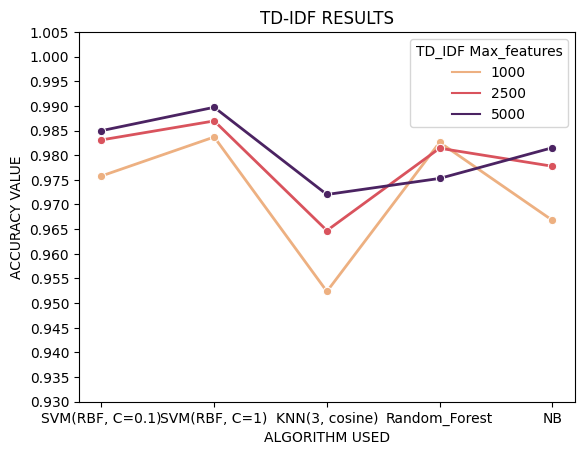

In [ ]:
sns.lineplot(x='algo', y='accuracy', hue='tdif_feat', data=results, palette='flare', marker='o', dashes=False, linewidth=2, legend='full')
plt.yticks(np.arange(0.93,1.01, step=0.005))
plt.xlabel('ALGORITHM USED')
plt.ylabel('ACCURACY VALUE')
plt.title('TD-IDF RESULTS')
plt.legend(title='TD_IDF Max_features')

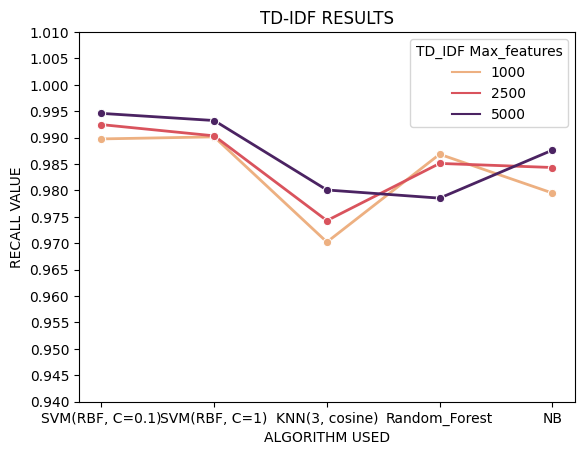

In [ ]:
sns.lineplot(x='algo', y='recall', hue='tdif_feat', data=results, palette='flare', marker='o', dashes=False, linewidth=2, legend='full')
plt.yticks(np.arange(0.94,1.01, step=0.005))
plt.xlabel('ALGORITHM USED')
plt.ylabel('RECALL VALUE')
plt.title('TD-IDF RESULTS')
plt.legend(title='TD_IDF Max_features')

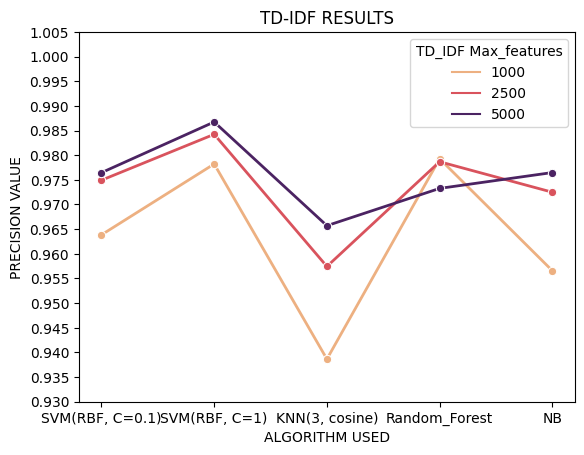

In [ ]:
sns.lineplot(x='algo', y='prec', hue='tdif_feat', data=results, palette='flare', marker='o', dashes=False, linewidth=2, legend='full')
plt.yticks(np.arange(0.93,1.01, step=0.005))
plt.xlabel('ALGORITHM USED')
plt.ylabel('PRECISION VALUE')
plt.title('TD-IDF RESULTS')
plt.legend(title='TD_IDF Max_features')

In [ ]:
df['count'] = df['tokenized_text'].apply(lambda x: len(x))

In [ ]:
print(df.head())

   Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1        vastar resources  inc    
2           2  calpine daily gas nomination   
3           3                     re  issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  \
0                                                         ham  1999-12-10   
1  gary  production from the high island larger b...      ham  1999-12-13   
2                calpine daily gas nomination 1  doc      ham  1999-12-14   
3  fyi  see note below  already done \nstella\n  ...      ham  1999-12-14   
4  fyi \n                      forwarded by lauri...      ham  1999-12-14   

                                                text  \
0                      christmas tree farm pictures    
1  vastar resources  inc  gary  production from t...   
2  calpine daily gas nomination  calpine daily ga...   
3  re  issue fyi  see note bel

(0.0, 2000.0)

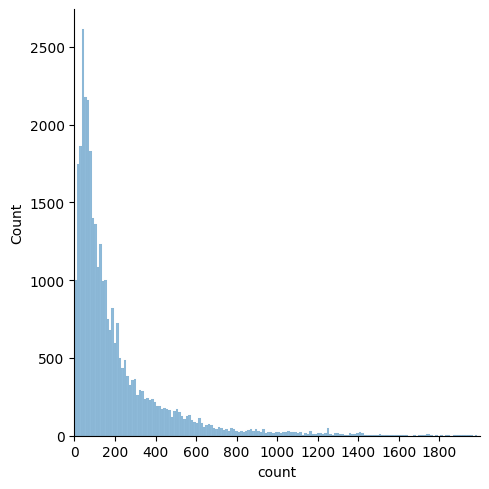

In [ ]:
sns.displot(data=df['count'], alpha=0.5)
plt.xticks(np.arange(0,2000 ,step=200))
plt.xlim(0,2000)

In [ ]:
results_w = pd.DataFrame(columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])
print(results_w)

Empty DataFrame
Columns: [algo, prec, recall, accuracy, word2vec_dim]
Index: []


In [ ]:
results_w = pd.concat([results_w, pd.DataFrame([['SVM(Poly, C=0.1)',0.9632422, 0.9883946, 0.9747899, 50]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['SVM(Poly, C=0.1)',0.9641847, 0.9893617, 0.9757785, 100]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['SVM(Poly, C=0.1)',0.9641915, 0.9895551, 0.9758774, 200]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['SVM(Poly, C=0.1)',0.9645617, 0.9897485, 0.976174, 300]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)

In [ ]:
results_w = pd.concat([results_w, pd.DataFrame([['SVM(RBF, C=1)',0.9767042, 0.9893617, 0.9825012, 50]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['SVM(RBF, C=1)',0.9774852, 0.9909091, 0.9836876, 100]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['SVM(RBF, C=1)', 0.9789996, 0.9918762, 0.9849728, 200]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['SVM(RBF, C=1)', 0.9790076, 0.9922631, 0.9851705, 300]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)

In [ ]:
results_w = pd.concat([results_w, pd.DataFrame([['KNN(3, cosine)', 0.9786415, 0.9837524, 0.9807217, 50]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['KNN(3, cosine)', 0.9783449, 0.9787234, 0.9780524, 100]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['KNN(3, cosine)', 0.9793795, 0.9829787, 0.9807217, 200]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['KNN(3, cosine)', 0.9743982, 0.9864603, 0.9798319, 300]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)

In [ ]:
results_w = pd.concat([results_w, pd.DataFrame([['Random_Forest',  0.9755539, 0.9880077, 0.981216, 50]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['Random_Forest', 0.9770335, 0.9874275, 0.9817103, 100]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['Random_Forest', 0.9763178, 0.9887814, 0.9820069, 200]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)
results_w = pd.concat([results_w, pd.DataFrame([['Random_Forest', 0.9770554, 0.9883946, 0.9822046, 300]],
                                           columns=['algo', 'prec', 'recall', 'accuracy', 'word2vec_dim'])], ignore_index=True)

In [ ]:
print(results_w)

                algo      prec    recall  accuracy word2vec_dim
0   SVM(Poly, C=0.1)  0.963242  0.988395  0.974790           50
1   SVM(Poly, C=0.1)  0.964185  0.989362  0.975778          100
2   SVM(Poly, C=0.1)  0.964191  0.989555  0.975877          200
3   SVM(Poly, C=0.1)  0.964562  0.989749  0.976174          300
4      SVM(RBF, C=1)  0.976704  0.989362  0.982501           50
5      SVM(RBF, C=1)  0.977485  0.990909  0.983688          100
6      SVM(RBF, C=1)  0.979000  0.991876  0.984973          200
7      SVM(RBF, C=1)  0.979008  0.992263  0.985170          300
8     KNN(3, cosine)  0.978642  0.983752  0.980722           50
9     KNN(3, cosine)  0.978345  0.978723  0.978052          100
10    KNN(3, cosine)  0.979379  0.982979  0.980722          200
11    KNN(3, cosine)  0.974398  0.986460  0.979832          300
12     Random_Forest  0.975554  0.988008  0.981216           50
13     Random_Forest  0.977033  0.987428  0.981710          100
14     Random_Forest  0.976318  0.988781

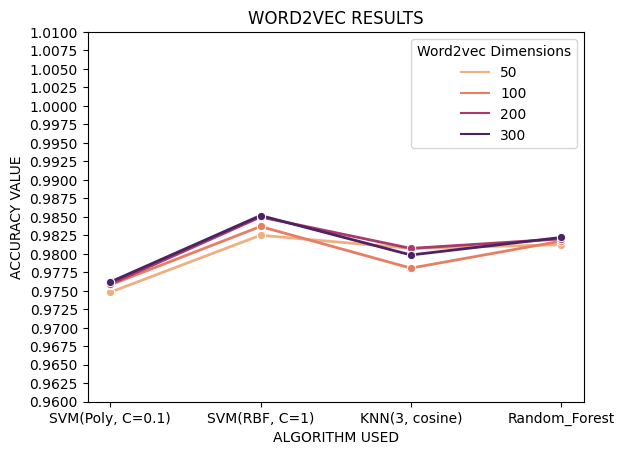

In [ ]:
sns.lineplot(x='algo', y='accuracy', hue='word2vec_dim', data=results_w, palette='flare', marker='o', dashes=False, linewidth=2, legend='full')
plt.yticks(np.arange(0.96,1.01, step=0.0025))
plt.xlabel('ALGORITHM USED')
plt.ylabel('ACCURACY VALUE')
plt.title('WORD2VEC RESULTS')
plt.legend(title='Word2vec Dimensions')

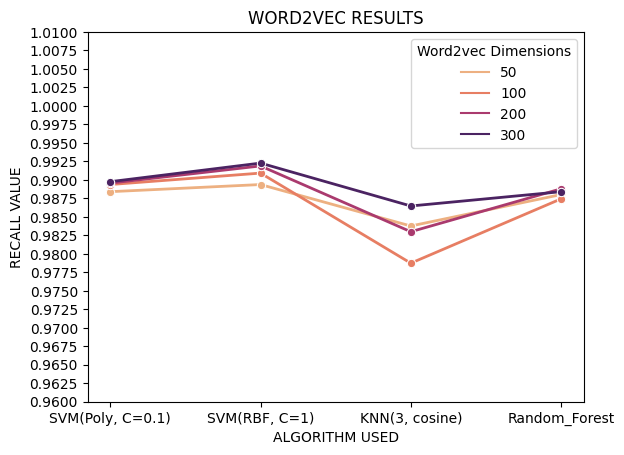

In [ ]:
sns.lineplot(x='algo', y='recall', hue='word2vec_dim', data=results_w, palette='flare', marker='o', dashes=False, linewidth=2, legend='full')
plt.yticks(np.arange(0.96,1.01, step=0.0025))
plt.xlabel('ALGORITHM USED')
plt.ylabel('RECALL VALUE')
plt.title('WORD2VEC RESULTS')
plt.legend(title='Word2vec Dimensions')

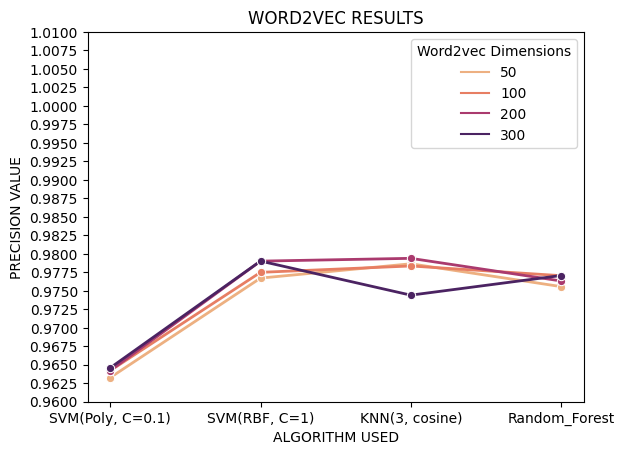

In [ ]:
sns.lineplot(x='algo', y='prec', hue='word2vec_dim', data=results_w, palette='flare', marker='o', dashes=False, linewidth=2, legend='full')
plt.yticks(np.arange(0.96,1.01, step=0.0025))
plt.xlabel('ALGORITHM USED')
plt.ylabel('PRECISION VALUE')
plt.title('WORD2VEC RESULTS')
plt.legend(title='Word2vec Dimensions')